# draft

## Import data

In [2]:
from numpy import loadtxt, gradient
matplotlib.style.use('default')
from matplotlib.pyplot import subplots, show

# Load data
filename = 'partA/training1.csv'
data = loadtxt(filename, delimiter=',', skiprows=1)

# Split into columns
index, time, distance, velocity_command, raw_ir1, raw_ir2, raw_ir3, raw_ir4, \
    sonar1, sonar2 = data.T

v_com = velocity_command

dt = time[1:] - time[0:-1]
v_est = gradient(distance, time)




## import sensor model

## Python code to solve non-linear least squares

## Brute 

In [3]:
import numpy as np
import scipy as sp

def diff(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

def invertH_Newton(hfunc, z, initial_guess=5.0, tol=1e-5, max_iterations=1000):
    curguess = initial_guess
    iterations = 0

    while iterations < max_iterations:
        f_of_x = hfunc(curguess) - z  # f(x) = h(x) - z
        f_prime_of_x = diff(hfunc, curguess)  # f'(x)

        if abs(f_of_x) < tol:
            return curguess

        if f_prime_of_x == 0:
            print("Derivative is zero. No solution found.")
            return None

        curguess = curguess - f_of_x / f_prime_of_x  # Newton's update
        iterations += 1

    print("Exceeded maximum iterations. No solution found.")
    return None

# Test with a sample function and its target value
def sample_hfunc(x):
    return x ** 2



h_ir4_modle = lambda x,a1,a2,b1,b2,c1,c2,d1,d2,e1,e2,f: (a1*(x+d1)**2 + b1*(x+e1) + c1) / (a2*(x+d2)**2 + b2*(x+e2) + c2) + f
params,cov = sp.optimize.curve_fit(h_ir4_modle,distance,raw_ir4)

a1 = params[0]
a2 = params[1]

b1 = params[2]
b2 = params[3]

c1 = params[4]
c2 = params[5]

d1 = params[6]
d2 = params[7]

e1 = params[8]
e2 = params[9]

f = params[10]


h_ir4 = lambda x: (a1*(x+d1)**2 + b1*(x+e1) + c1) / (a2*(x+d2)**2 + b2*(x+e2) + c2) + f




# ir4_x, ir4_v,ir4_fit,ir4_params= mm.remove_outlier(h_ir4_modle,distance,raw_ir4,3)



# params = ir4_params

# a0_ir4 = params[0]
# b0_ir4 = params[1]
# c0_ir4 = params[2]
# a1_ir4 = params[3]
# b1_ir4 = params[4]
# c1_ir4 = params[5]

                                                          
target_value = 25
print(invertH_Newton(h_ir4, target_value))


Derivative is zero. No solution found.
None


# Draft 2m

In [4]:
from numpy import loadtxt, gradient
matplotlib.style.use('default')
from matplotlib.pyplot import subplots, show

# Load data
filename = 'partA/training1.csv'
data = loadtxt(filename, delimiter=',', skiprows=1)

# Split into columns
index, time, distance, velocity_command, raw_ir1, raw_ir2, raw_ir3, raw_ir4, \
    sonar1, sonar2 = data.T

v_com = velocity_command

dt = time[1:] - time[0:-1]
v_est = gradient(distance, time)


In [5]:
import Model.IR_model as mm
ir3_x, ir3_v,ir3_fit,ir3_params= mm.remove_outlier(mm.ir3_model,distance,raw_ir3,3)

# mm.plot_fit_line(ir3_x,ir3_v,ir3_fit,"IR3")
# mm.Residual_and_Histogram(ir3_x,ir3_v,ir3_fit)

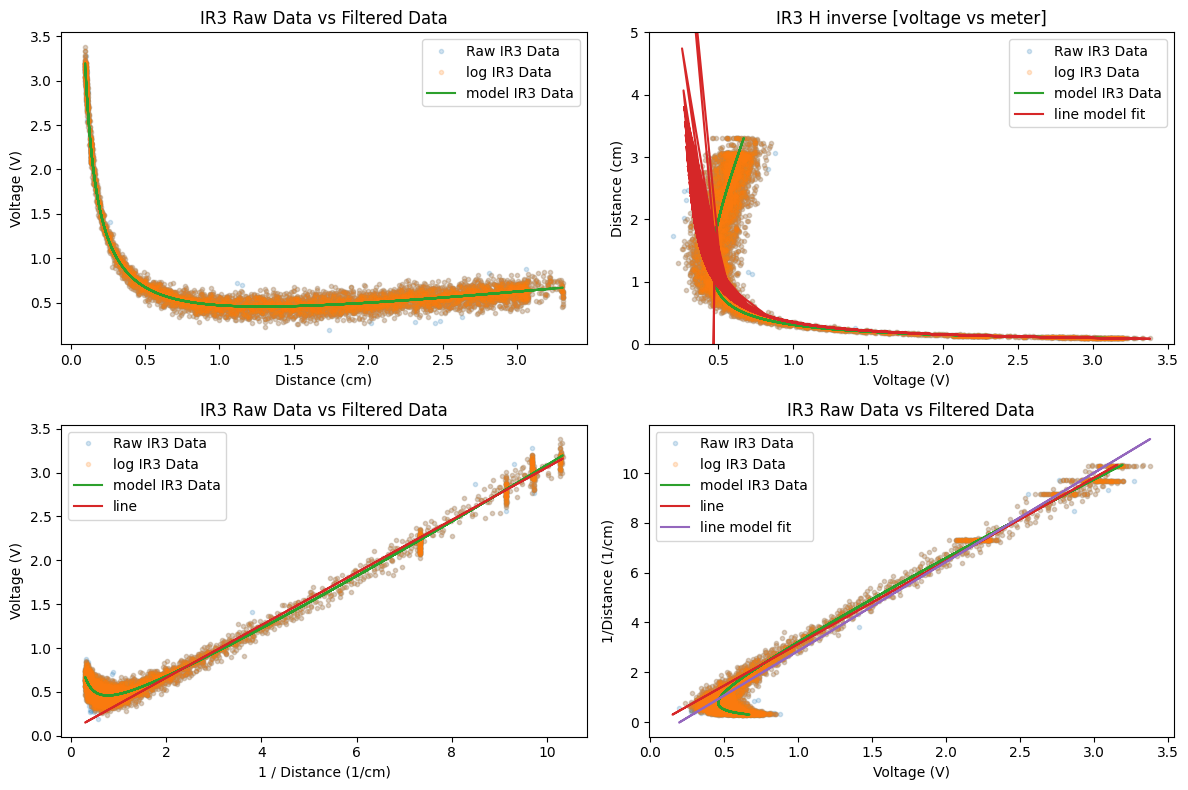

In [6]:
import numpy as np
import scipy as sp
import math
from numpy.linalg import lstsq
import matplotlib.pyplot as plt
# def model(r,k):
    # return k[0] + k[1] / (r+ k[2] )
    
def model(r,a,b,c):
    return a + b/(r+c) 
    
def model_inv(y,k):
    return k[1] / (y - k[0] ) - k[2]

def my_line(x):
    return 0.28* x + 0.2

def my_line_inv(x):
    return (x - 0.2)/0.28

def my_line_inv2(x):
    return 0.28/(x - 0.2)


# fig, ax = plt.subplots(2, 2, figsize=(12, 8))
# fig, ax = plt.subplots(2, 2)  # Creates a 2x2 grid of subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
# First subplot
ax[0, 0].set_title("IR3 Raw Data vs Filtered Data")
ax[0, 0].plot(distance, raw_ir3, '.', alpha=0.2, label='Raw IR3 Data')
ax[0, 0].plot(ir3_x, ir3_v, '.', alpha=0.2, label='log IR3 Data')
ax[0, 0].plot(ir3_x, ir3_fit, label='model IR3 Data')
ax[0, 0].set_xlabel('Distance (cm)')
ax[0, 0].set_ylabel('Voltage (V)')
ax[0, 0].legend()

# Second subplot
ax[0, 1].set_title("IR3 H inverse [voltage vs meter]")
ax[0, 1].plot(raw_ir3, distance, '.', alpha=0.2, label='Raw IR3 Data')
ax[0, 1].plot(ir3_v, ir3_x, '.', alpha=0.2, label='log IR3 Data')
ax[0, 1].plot(ir3_fit, ir3_x, label='model IR3 Data')

ddh = my_line_inv2(raw_ir3)
ax[0, 1].plot(raw_ir3, ddh, label='line model fit')
ax[0, 1].set_ylabel('Distance (cm)')
ax[0, 1].set_xlabel('Voltage (V)')
ax[0, 1].set_ylim(0, 5)
ax[0, 1].legend()

# the IR 3 H-inverse
def mymode(x):
    return 0.3* x + 0.06
predicted_y_ir3 = mymode(1/ir3_x)
# Third subplot
ax[1, 0].set_title("IR3 Raw Data vs Filtered Data")
ax[1, 0].plot(1/distance, raw_ir3, '.', alpha=0.2, label='Raw IR3 Data')
ax[1, 0].plot(1/ir3_x, ir3_v, '.', alpha=0.2, label='log IR3 Data')
ax[1, 0].plot(1/ir3_x, ir3_fit, label='model IR3 Data')
ax[1, 0].plot(1/ir3_x, predicted_y_ir3, label='line')

ax[1, 0].set_xlabel('1 / Distance (1/cm)')
ax[1, 0].set_ylabel('Voltage (V)')
ax[1, 0].legend()


# Four subplot
ax[1, 1].set_title("IR3 Raw Data vs Filtered Data")
ax[1, 1].plot(raw_ir3, 1/distance, '.', alpha=0.2, label='Raw IR3 Data')
ax[1, 1].plot(ir3_v, 1/ir3_x, '.', alpha=0.2, label='log IR3 Data')
ax[1, 1].plot(ir3_fit, 1/ir3_x, label='model IR3 Data')
ax[1, 1].plot(predicted_y_ir3, 1/ir3_x, label='line')
ddd = my_line_inv(raw_ir3)
ax[1, 1].plot(raw_ir3, ddd, label='line model fit')
ax[1, 1].set_xlabel('Voltage (V)')
ax[1, 1].set_ylabel('1/Distance (1/cm)')
ax[1, 1].legend()

# Show all plots
plt.tight_layout()
# plt.show()


        

In [7]:
fig, ax = plt.subplots(1)
ax.set_title("IR3 H inverse [voltage vs meter]")
ax.plot(raw_ir3, distance, '.', alpha=0.2, label='Raw IR3 Data')
ax.plot(ir3_v, ir3_x, '.', alpha=0.2, label='log IR3 Data')
ax.plot(ir3_fit, ir3_x, label='model IR3 Data')



Xpoints = np.linspace(0, 3, 1000)
ddh = my_line_inv2(Xpoints)

ax.plot(Xpoints, ddh, label='line model fit')
ax.set_ylabel('Distance (cm)')
ax.set_xlabel('Voltage (V)')

plt.ylim(1.25,10)
# plt.xlim(0.33,3)
ax.legend()

In [8]:
def filter_Range( x, y,Min_x,Max_x):
    """
    """
    # Fit the initial model
    # params, cov = sp.optimize.curve_fit(model, x, y)

    # Calculate the residuals
    # residual = y - y_fit
    
    # Mask out data points that are within 3 standard deviations
    # mask_no_outlier = abs(residual) < np.std(residual) * std_coeff
    mask_no_outlier = (x > Min_x ) & (x < Max_x)

    y_no_outlier = y[mask_no_outlier]
    x_no_outlier = x[mask_no_outlier]
 
    # Refit the model to the optimized data
    # filtered_params, cov = sp.optimize.curve_fit(model, x_no_outlier, y_no_outlier)
    # filtered_fit = model(x_no_outlier, *filtered_params)
 
    return x_no_outlier, y_no_outlier 


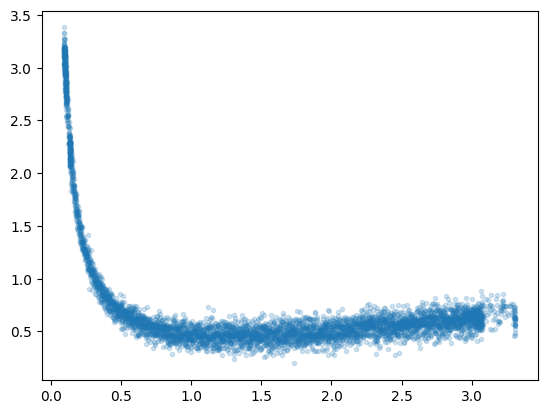

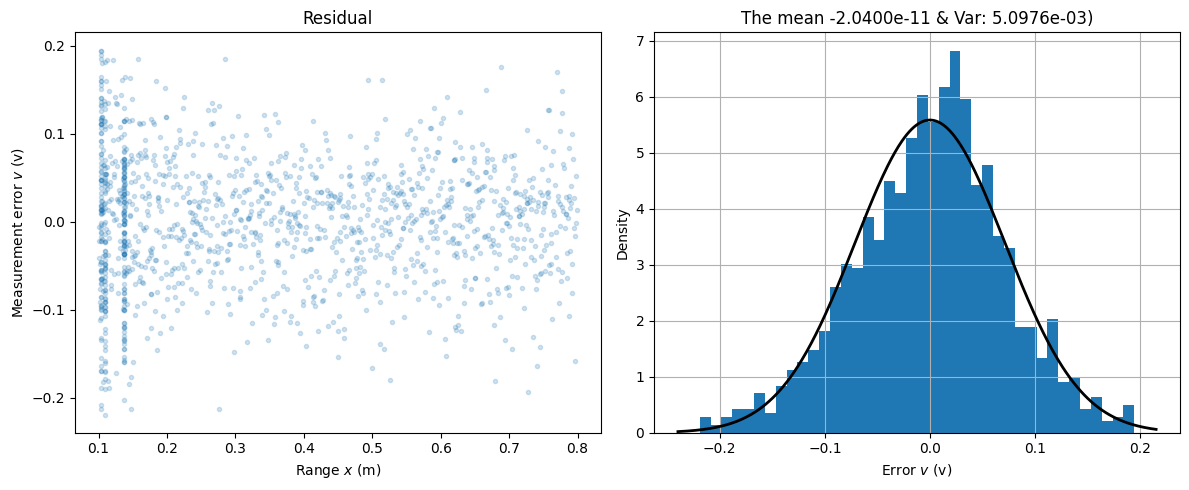

(-2.040049465595194e-11,
 0.07139749070745693,
 array([ 0.04746745,  0.01300803,  0.11080797, ..., -0.08543769,
        -0.09596131, -0.02203888]))

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)

new_x_ir3, new_y_ir3 = filter_Range(distance,raw_ir3,0.1,0.8)
ax.plot(distance , raw_ir3, '.',alpha =0.2)
# ax.plot(new_x, new_y, label='Fit line')
#

import Model.IR_model as mm
ir4_x, ir4_v,ir4_fit,ir4_params= mm.remove_outlier(mm.ir3_model,new_x_ir3,new_y_ir3,3)

mm.plot_fit_line(ir4_x,ir4_v,ir4_fit,"IR4")
mm.Residual_and_Histogram(ir4_x,ir4_v,ir4_fit)